   # CS 133 Hands-on 1
   ## First, we are going to learn some Markdown language


### This is an example
- level 1
    - level 2
    - level 2
        * level 3
___

**This is bold**

_This is italic_

> Hello

This is an example of print `print("Hello World")`

You can also write math symbols $y = \sqrt{k}$ + $x^2$ - $sin(y)$

# Now it's your turn, try to create a text cell and play around with different Markdown symbols
   Create a text/markdown cell and enter some text
   - Create a header using #, subheaders have more consecutive # signs
   - Create bullet points using -, +, or * (create sublist by adding 4 spaces before the bullet)
   - Create a horizontal line using 3 underscores ___
   - Bold text by enclosing the text with **
   - Italic text by by enclosing the text with using _
   - Create a code section by enclosing it with `
   - Create Blockquotes using >
   - Write with Math symbols by using \$. Here is a good cheatsheet: http://joshua.smcvt.edu/undergradmath/undergradmath.pdf
   



```
# This is formatted as code
```

**Here is your answer... Create a text box below**

#Header

- b1
+ b2
* b3

___
**bold**

_italic_

`print('hi")`

> blocknote?

$$
  {x^2} = \frac{1}{2}
$$

## You can quickly create simulated data within jupyter notebook.
### Here we create a normal distribution probability density plot

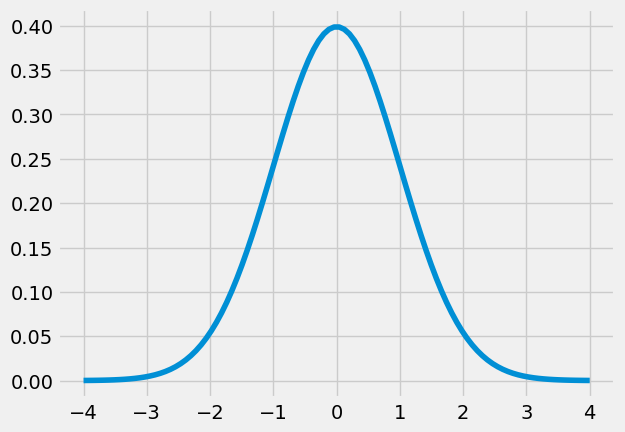

In [ ]:
import numpy as np
import scipy.stats as stats
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

mu = 0 # mean
std = 1 # variance
# Return 100 evenly spaced numbers over a specified interval (between -4 and 4)
x = np.linspace(start=-4, stop=4, num=100)
# A probability density function of a normal continuous random distribution
# More on normal distribution: https://en.wikipedia.org/wiki/Normal_distribution
y = stats.norm.pdf(x, mu, std)
plots.plot(x, y)
plots.show()

# You can also read in input data and quickly do some analysis

In [ ]:
from datascience import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

Table().with_column('Chapters', huck_finn_chapters)

# count the number of occurence of 'Tom' in each chapter
print(np.char.count(huck_finn_chapters, 'Tom'))

# create a table with the counts of three names for each chapter: 'Tom', 'Jim', and 'Huck'.
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])

# You don't need to use print to see what's in the table
counts

[ 6 24  5  0  0  0  2  2  0  0  2  3  1  0  0  0  3  5  0  0  0  0  0  0  0
  0  0  1  0  0  1  4 19 15 14 18  9 32 11 11  8 30  6]


Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


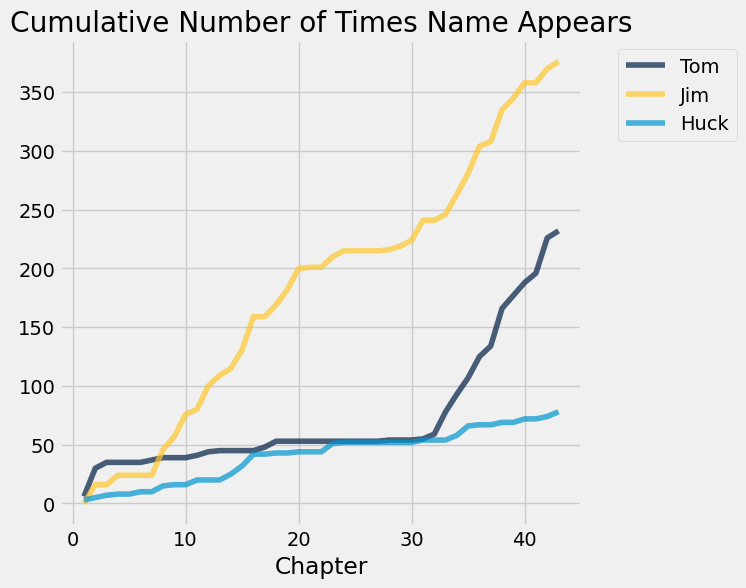

In [ ]:
##### Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
# Plot the cumulative counts for the 43 chapters

%matplotlib inline
# Table method references: https://www.data8.org/datascience/tables.html

# Create a new table and add the chapter numbers
cum_counts = Table().with_column('Chapter', np.arange(1, 44, 1))

# iterate over the character names
for character_name in counts.labels:
  # add a column to the new table with each character's cumulative appearances
  cum_counts = cum_counts.with_column(
    character_name, counts.column(character_name).cumsum())

# Plot and add title. Chapter numbers are on the x-axis
cum_counts.plot(column_for_xticks=0)
plots.title('Cumulative Number of Times Name Appears')
plots.show()

# Now it's your turn . . .

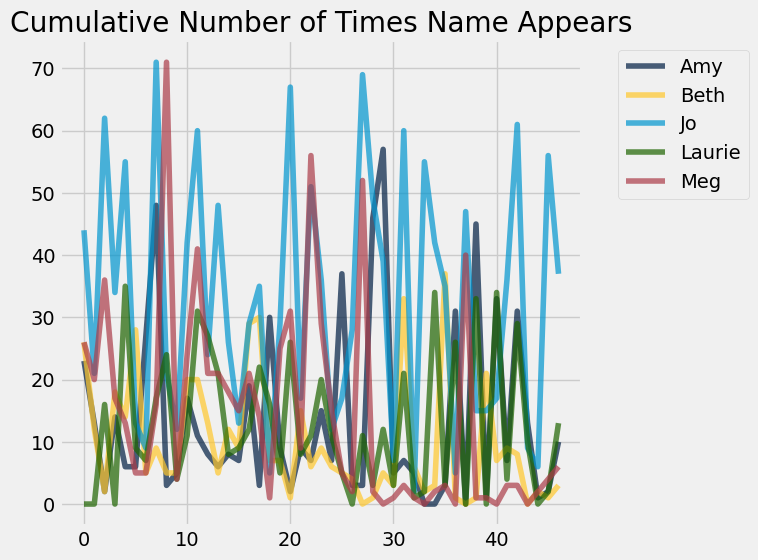

In [ ]:
# Try to do some word counting from the chapters in "The Little Women".
# Do the same thing as the above example for these 5 names: 'Amy', 'Beth', 'Jo', 'Laurie', 'Meg'
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Plot the cumulative counts for the 47 chapters

# Your code here

character_names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
counts = Table().with_column('Chapters', little_women_chapters)

# create a table with the counts of five names for each chapter
for character_name in character_names:
  counts = counts.with_columns(character_name, np.char.count(little_women_chapters, character_name))

#plot
pure_counts = counts.drop('Chapters')
pure_counts.plot()
plots.title('Cumulative Number of Times Name Appears')
plots.show()